In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center>Chapitre 4 : Algorithmique</center></span>

## D. Algorithmes d'optimisation

### Introduction

Un **problème d'optimisation** consiste à **chercher un optimum**, c'est-à-dire un **maximum ou un minimum**. Il existe énormément de situations où l'on souhaite optimiser quelque chose :
- minimiser le chemin pour aller de A à B,
- minimiser le coût d'installation d'un réseau,
- maximiser le nombre de passagers dans un avion,
- maximiser les bénéfices d'une entrepise,
- minimiser le temps passé à faire ses devoirs,
- maximiser ses résultats en NSI,
- ...

Cependant, **sans contraintes associées**, les ***solutions** de ces problèmes sont **triviales et/ou sans intérêt** :
- le plus court chemin ? "la ligne droite",
- reseau le moins cher ? "pas de réseau",
- maximum de passagers ? "pas de sièges",
- maximum de bénéfice ? "augmenter indéfiniment les prix",
- minimum de temps sur les devoirs ?"ne pas travailler du tout",
- réussir en NSI ? "???",
- ...

Pour définir un **problème d'optimisation**, il nous faut donc :
- une **fonction des variables** du problème dont on veut **optimiser** la valeur,
- une **série de contraintes** auxquelles doivent obéir les **variables** du problème.

**Exemple :**
Comment relier entre eux tous les ordinateurs de mon réseau en utilisant un minimum de longueur de câble ?  
Il faut minimiser une fonction qui renvoie la longueur de câble utilisée en fonction des ordinateurs que l'on choisi de relier. La seule contrainte est que tous les ordinateurs soient reliés à au moins un autre ordinateur du réseau. 

### I. Les algorithmes gloutons (*greedy algorithm*)

#### 1. Un exemple visuel

Voici une représentation en 3D d'une surface en relief.
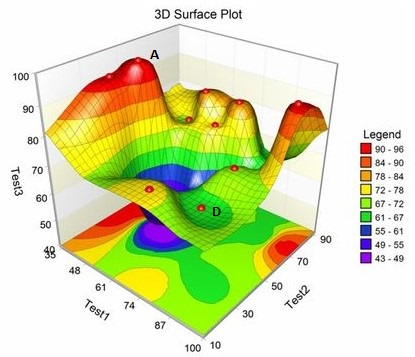

Imaginons que l'on cherche **le plus court chemin pour aller du point de départ D au point d'arrivée A**.  
Ajoutons une **contrainte**, par exemple sur dénivellé total : on ne veut **pas descendre ou monter de plus d'une certaine hauteur**.

Quelle **stratégie** (algorithme) pouvons nous adopter pour trouver ce chemin ?

Le temps que je pose la question et **votre cerveau**, extêmement performant pour trouver des solutions à n'importe quel problème, vous a sans doute déjà proposé une ou plusieurs solutions. Par exemple : partir vers la gauche, jusqu'au somment de la colline jaune, puis monter la montagne et suivre la ligne de crête jusqu'en A.
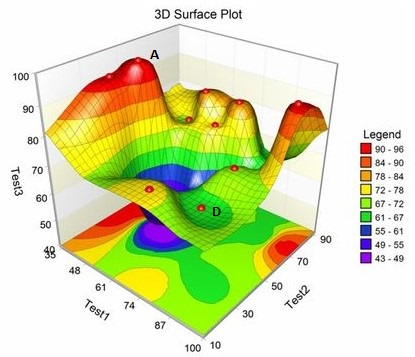

C'est peut être la meilleure solution ... peut être pas ... Mais **comment pourrait faire un programme informatique** pour répondre à cette question ?

#### 2. Résolution par brute force

Le **principe du brute force** est extrêmement simple : on **teste toutes les possibilités et à la fin, on choisit la meilleure**.

**Avantage :** Ca marche à tous les coups.
**Inconvénient :** A part pour les problèmes simplistes, ça prend énormément de temps.

On sent bien que la plupart du temps, il doit exister un moyen de gagner du temps en explorant pas toutes les possibilités. Quitte à prendre le risque de ne peut être pas trouver **la** meilleure solution mais seulement une qui s'en approche.

Dans l'exemple précédent, votre cerveau a sûrement d'emblée éliminer l'option de partir vers la droite, dans une région qui est beaucoup plus vallonée.

#### 3. Résolution intelligente

Bien souvent, la résolution réellement optimum d'un problème d'optimisation, nécessite des algorithmes soit très complexes à mettre en oeuvre, soit très spécifiques du problème considéré et donc inapplicables ailleurs.

Par conséquent, à moins que l'optimisation soit vraiment cruciale, il peut être préférable d'utiliser un **algorithme glouton** qui a **l'avantage d'être assez simple à mettre en oeuvre** mais **l'inconvénient de ne pas toujours garantir de trouver la meilleure solution**.

#### 4. Une stratégie locale

Un algorithme glouton adopte la stratégie d'un animal qui, à la recherche de nourriture, **se dirige à chaque instant vers l'endroit le plus proche où il entrevoit le plus de nourriture**. Sa **stratégie** est donc **locale**, il ne regarde pas plus loin que le bout de son nez, quitte à se précipiter dans un piège ou dans un cul de sac.

Ce n'est pas, le plus souvent, la stratégie adoptée par votre cerveau qui cherche au contraire à avoir un point de vue plus général de la situation.

Toujours avec le même exemple de chemin minimisant le dénivellé, un algorithme glouton pourrait par exemple décider à chaque pas de choisir parmi 3 directions (vers A, 15° à droite de A et 15° à gauche de A) celle qui présente le moins de dénivellé. On peut supposer que cet algorithme nous permettrait d'arriver en A, et sans doute avec un dénivellé pas trop important. Mais aurions nous trouver la meilleure solution ? Probablement pas. :(

D'autres choix sont possibles :
- Je vais vers A, sauf si le dénivellé dépasse un certain seuil, auquel cas je dévie vers la droite d'un certain angle.
- Je choisis la pente la plus faible, sauf si ça m'éloigne de A.
- Pour chaque direction possible pour mon prochain pas, je calcule le rapport entre la pente et la diminution de distance par rapport à A et je choisis la plus petite valeur.
- ...

Dans tous les cas, j'applique un **algorithme glouton car je prends ma décision uniquement par rapport à mon prochain pas, sans regarder où cela pourra me mener quelques pas plus loin**.

**Remarque :** En pratique, si l'algorithme nécessite un grand nombre de pas, un algorithme peut encore être dit glouton si la prise de décision se fait en regardant un peu plus loin que le prochain pas. Le tout est de ne pas adopter une approche globale du problème

### II. 1er exemple : Le problème des stations essence

#### 1. Poser le problème

Un automobiliste part en vacances et doit parcourir un long trajet. Il prend la route avec le plein de carburant. On note $d$ a **distance maximale** (supposée constante) qu'il peut parcourir **avec un plein**. Son trajet est déjà décidé et il sait combien de stations essence il comporte, ainsi que leurs positions respectives. On note $d_0, d_1, d_2, ..., d_n$ les **distances jusqu'à la prochaine station** (sauf $d-n$ qui est la distance entre la dernière station et l'arrivée).

#### 2. Un problème d'optimisation

Le problème est de savoir **dans quelles stations il doit s'arrêter** pour être sûr de ne **pas tomber en panne d'essence**, tout en **s'arrêtant un nombre minimum de fois**. On suppose bien sûr qu'aucune des distances n'est plus grande que $d$, sinon il n'y a pas de solution.

Il s'agit bien d'un **problème d'optimisation** : on veut **minimiser le nombre d'arrêts** avec la **contrainte de ne pas dépasser la distance $d$ entre 2 arrêts**.

A chaque station, il y a 2 choix, s'arrêter ou ne pas s'arrêter et donc $2^n$ choix possibles au total. Une **résolution en brute force** ne serait donc **plus possible dès que $n$ devient grand** ($2^{1000}\approx 10^{301}$).

#### 3. La solution de l'algorithme glouton

Pour résoudre ce problème avec un **algorithme glouton**, il suffit de **décider à chaque station que l'on continue s'il nous reste assez d'essence pour atteindre la prochaine station, sinon on s'arrête**. Chaque choix est donc bien effectué uniquement par rapport à la prochaine étape.

Il n'est pas très compliqué de se convaincre que cet algorithme glouton devrait **permettre de trouver la solution optimale**; et c'est bien le cas. D'ailleurs, en l'absence d'autres contraintes (repos toutes les 2 heures, pause pipi, embouteillages, disputes des enfants, ...) c'est certainement ce que le cerveau conseillerait de faire à tout conducteur un peu sensé.

### III. 2ème exemple : Le problème du rendu de monnaie

#### 1. Poser le problème

Un commerçant doit **rendre la monnaie** à son client. Il dispose pour cela d'un certain **système de $n$ pièces** (la valeur des pièces qui existent) et pour simplifier, on peut supposer qu'il en possède une quantité infinie de chaque. Notons $p_0, p_1, ... p_n$ la **valeur des pièces existantes** en centimes, rangées par **ordre croissant**. La somme $r$ à rendre est aussi exprimée en centimes.

#### 2. Un problème d'optimisation

Le problème est de savoir **quelles pièces il doit rendre** pour être rendre **la somme nécessaire**, tout en **rendant un minimum de pièces**. On suppose $p_0 = 1$, sinon certaines sommes ne pourront pas être rendues.

Il s'agit bien d'un **problème d'optimisation** : on veut **minimiser le nombre de pièces rendues** avec la **contrainte que la somme de leurs valeurs soit bien égale à $r$**.

Ce problème est plus complexe que le précédent, car pour chaque pièce, on doit choisir combien en rendre parmi beaucoup plus de 2 possibilités. Pour la pièce de valeur $p_0 = 1$ centime, on peut en rendre entre $0$ et $r$ par exemple. Le résoudre en **force brute est donc encore moins envisageable**.

#### 3. La solution de l'algorithme glouton

Pour résoudre ce problème avec un **algorithme glouton**, il faut **passer en revue les pièces en partant de celles de plus grandes valeurs**. **Dès qu'on peut en rendre une** (dès que $p_k \leq r$) on le fait et on **met à jour la somme restant à rendre** (elle devient $r-p_k$). Puis on **recommence en repartant de la même pièce** et ainsi de suite **jusqu'à ce que la somme restant à rendre soit égale à zéro**.

Avec le **système de pièces de la zone euro**, comme avec la plupart des systèmes de pièces actuels, cet **algorithme glouton est optimal**. **Mais il ne l'est pas avec n'importe quel système de pièces.** En fait, il l'est devenu après la révolution française, grâce à la généralisation du système décimal qui a permis de rationnaliser les systèmes de monnaie.

Mais jusqu'en 1971, le système de monnaie utilisé au Royaume-Uni (1, 3, 4, 6, 12 pences puis 1 shilling, ...), par exemple, ne donnait pas une solution optimale avec cet algorithme (l'optimum pour rendre 8 pences est de rendre 2 pièces de 4 pences alors que l'algorithme glouton aboutit à 1 pièce de 6 pences et 2 pièces de 1 penny).

### IV. 3ème exemple : Le problème du sac à dos

#### 1. Poser le problème

Un voleur dispose devant lui d'un certain **nombre $n$ d'objets**, chacun caractérisé par **sa valeur $v_i$** et **son poids $p_i$**. Il doit **choisir son butin** de façon à emporter **la plus grande valeur $V$ possible** sachant que son sac à dos ne pourra pas supporter davantage qu'un certain **poids maximum $P$**.

**Remarque :** Il existe une **variante dite fractionnaire du problème** dans laquelle on peut emporter une fraction de son choix de chaque objet.

#### 2. Un problème d'optimisation

Le problème est de savoir **quels objets choisir**, sans dépasser le **poids limite**, tout en **emportant un butin de valeur maximale**. On suppose qu'il existe au moins un objet tel que $p_i \leq P$, sinon le voleur ne peut rien emporter.

Il s'agit bien d'un **problème d'optimisation** : on veut **maximiser la valeur $V$ du butin** avec la **contrainte de ne pas dépasser le poids maximum $P$**.

Ce problème a l'air plutôt simple puisque pour chaque objet, il n'y a que 2 choix : le voler ou le laisser. Cependant, on voit bien qu'il parait **difficile de faire le bon choix sans regarder le problème de façon globale**. Et effectivement, nous allons voir qu'un **algorithme glouton ne donnera pas ici, en général, le choix optimum**.

#### 3. La solution de l'algorithme glouton

Pour résoudre ce problème avec un **algorithme glouton**,  il existe au moins **3 façons différentes de choisir** les objets à emporter.

Soit on commence par prendre les objets **les plus chers**, soit **les plus légers**, soit **les plus rentables**, c'est-à-dire ceux dont le **rapport valeur/poids est le plus grand**.

Dans les 3 cas, on commence par **ignorer tous les objets dont le poids $p_i$ est supérieur à $P$**. Il suffit ensuite de **trier les objets par ordre décroissant selon le critère choisi** (valeur, poids ou rentabilité) et de **remplir** son sac **en commencant par le premier** et **tant que le poids $P$ n'est pas dépassé**.

Le meilleur **choix parmi ces 3 stratégies dépend de la répartition de valeur et de poids des objets** mais en général, ces algorithmes gloutons ne **permettent pas d'obtenir le remplissage optimum** du sac à dos. A part avec la variante fractionnaire où le critère de la rentablilité permet de trouver l'optimum.

Pour terminer, passons à la pratique avec le [TP](TP_04_1.ipynb) suivant ...